In [88]:
import matplotlib.pyplot as plt
from keras.models import load_model
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import tensorflow as tf
import seaborn as sns
from keras.preprocessing import image
import cv2
import os

In [21]:
physical_devices = tf.config.list_physical_devices('GPU')
if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)


In [22]:
test_set_path = r"C:\Users\BrunoLuciano\OneDrive - ITS Angelo Rizzoli\Documents\Deep_learning_project\Data\Test_set"
model_path = r'C:\Users\BrunoLuciano\OneDrive - ITS Angelo Rizzoli\Documents\Deep_learning_project\model\lego.keras'

In [23]:
image_size = (300, 300)
batch_size = 32

In [24]:
 
datagen_2 = ImageDataGenerator(rescale=1./255)   

In [25]:
test_set = datagen_2.flow_from_directory(
        directory=test_set_path,
        class_mode='categorical',
        color_mode="grayscale",
        target_size=image_size,
        batch_size=batch_size,
        shuffle=False,
        seed=42,
        interpolation="bilinear"
    )
    

Found 12000 images belonging to 50 classes.


In [26]:
model = load_model(model_path)

In [27]:

y_hat_pre = model.predict(test_set)
y_hat = np.argmax(y_hat_pre, axis=1)

y_true = test_set.classes

loss, accuracy = model.evaluate(test_set)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

375/375 [==============================] - 179s 476ms/step - loss: 1.2565 - accuracy: 0.5758
Loss: 1.2565363645553589
Accuracy: 0.5758333206176758


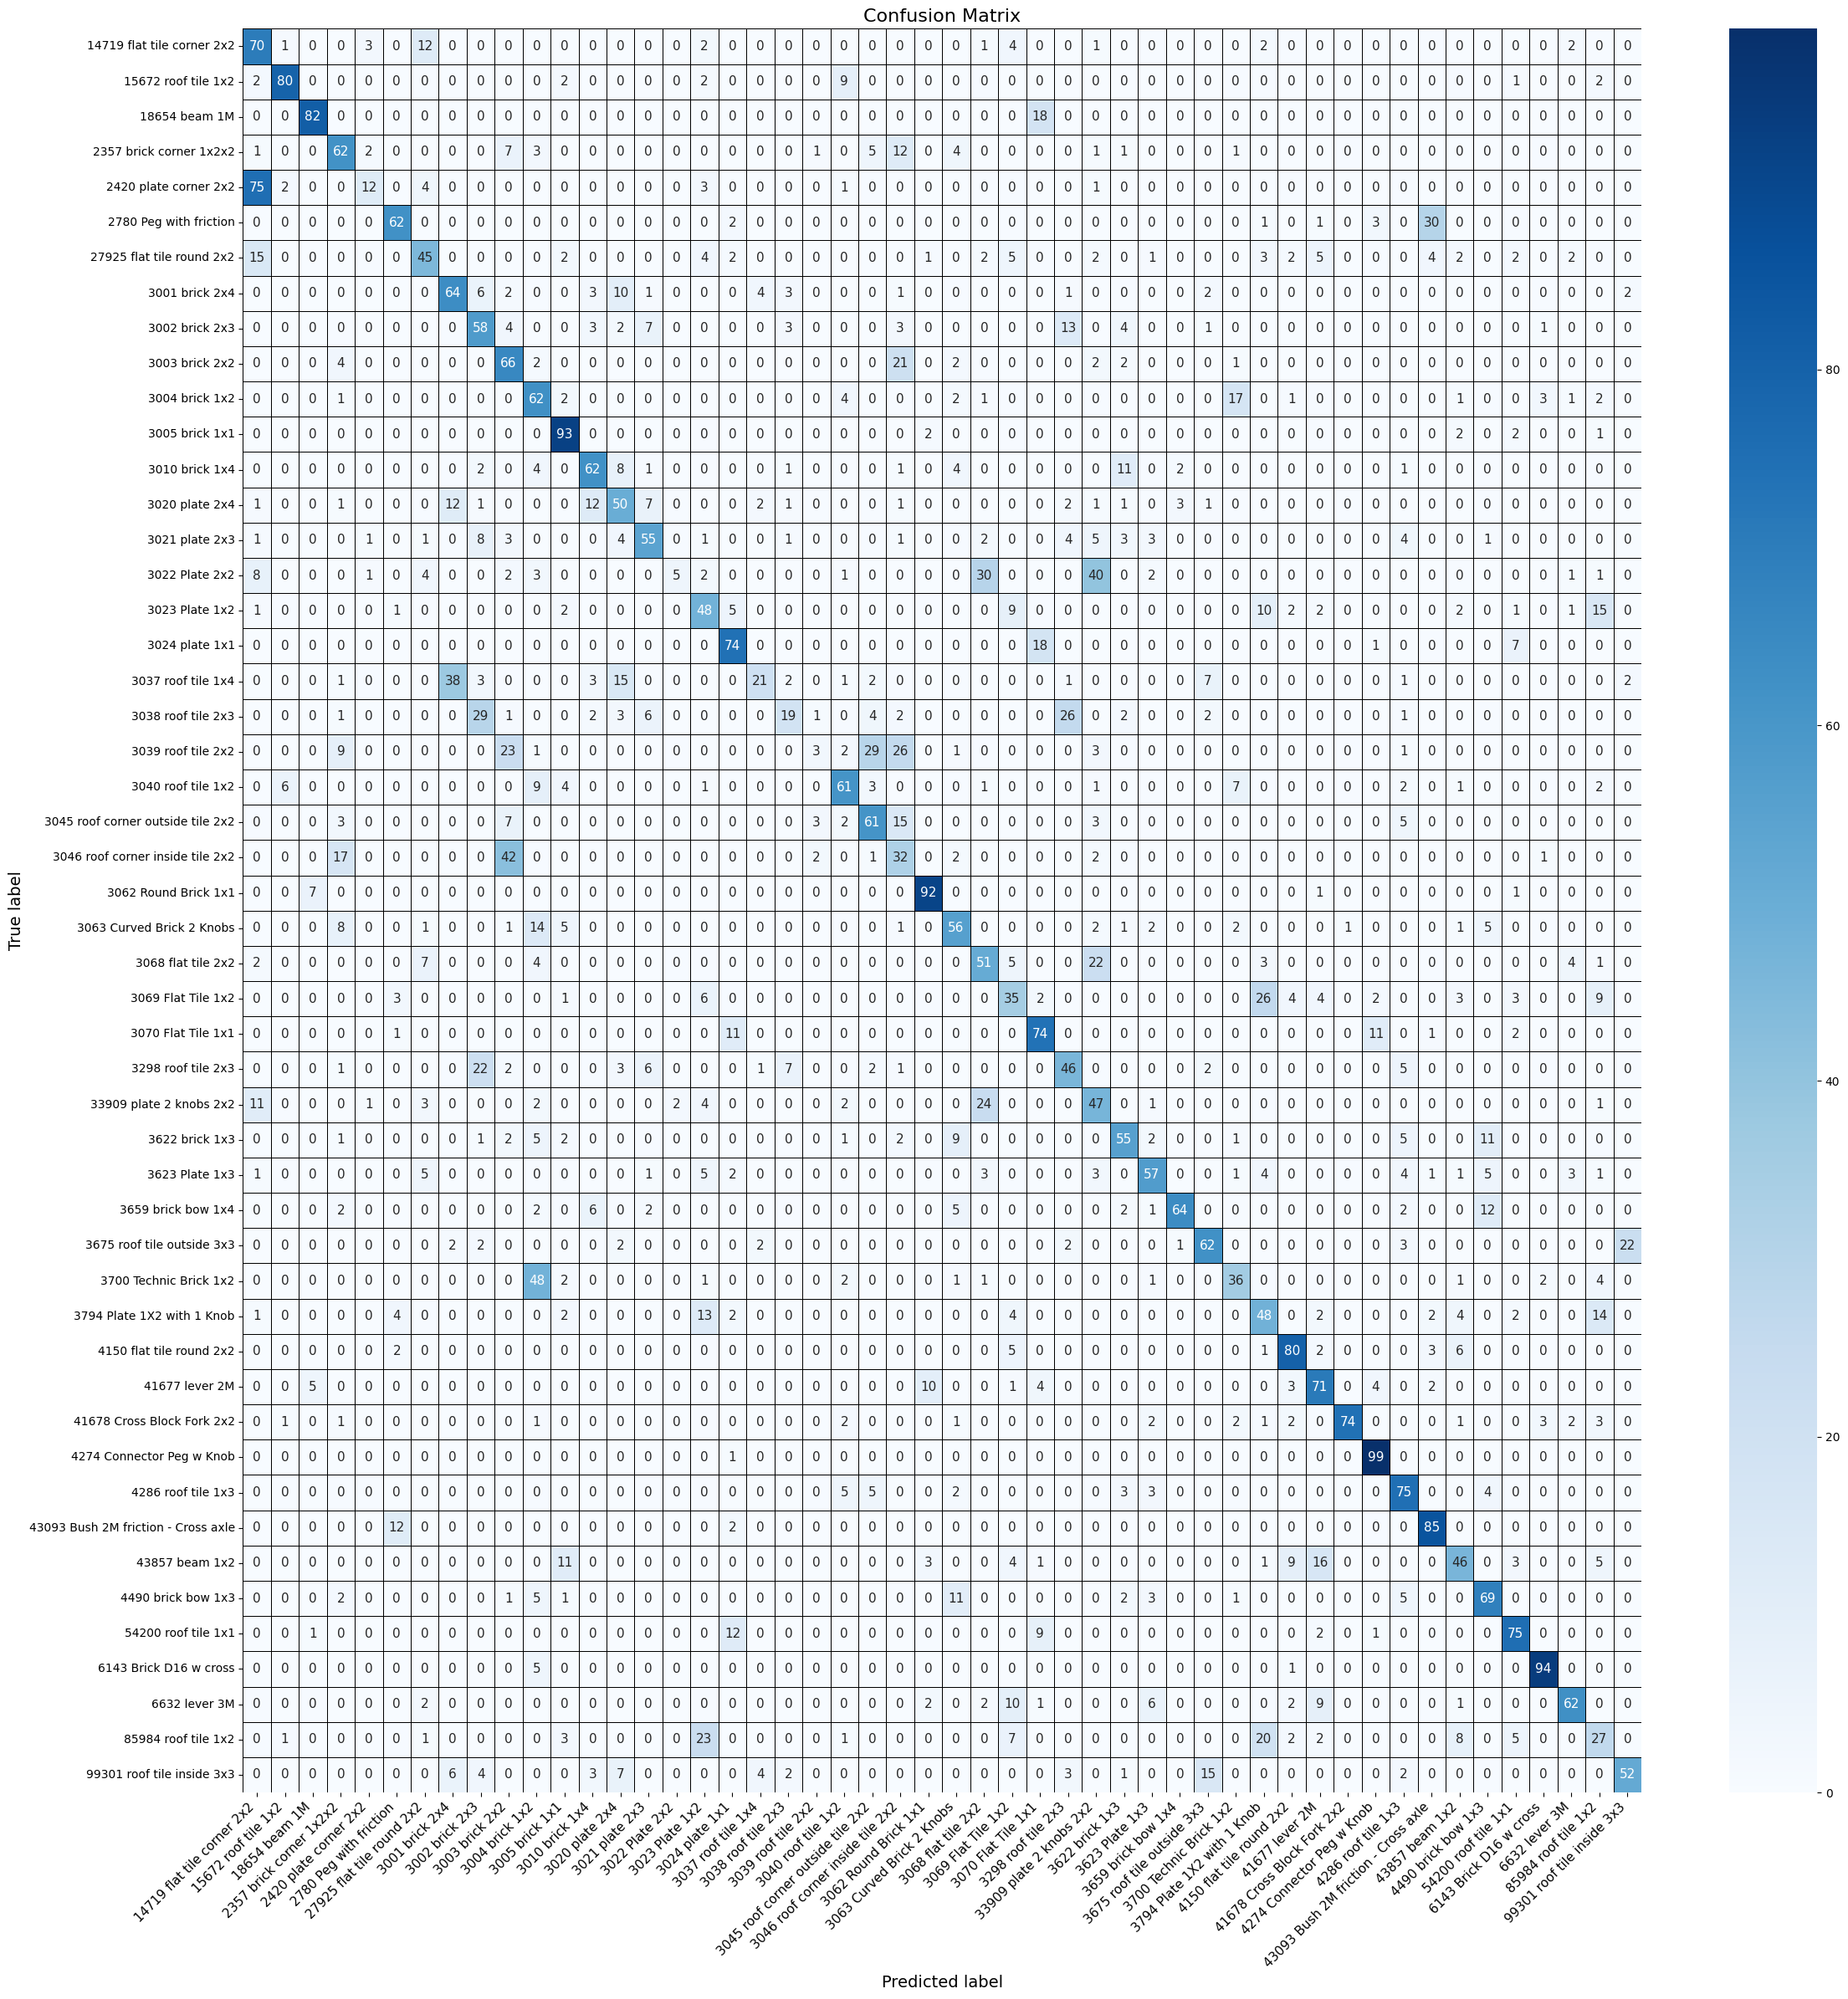

In [28]:

# Calcola la matrice di confusione
cm = confusion_matrix(y_true, y_hat)

# Normalizza la matrice di confusione
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Moltiplicare ogni numero per 100 per ottenere le percentuali
cm_percent = cm_normalized * 100

# Etichette delle classi
class_labels = list(test_set.class_indices.keys())


# Crea la heatmap
plt.figure(figsize=(24, 24))
ax = sns.heatmap(cm_percent, annot=True, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels,
                fmt='.0f', annot_kws={"size": 11}, linewidths=0.5, linecolor='black')

# Impostazioni per migliorare la leggibilità delle etichette sull'asse x
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=11, horizontalalignment='right')
ax.set_yticklabels(ax.get_yticklabels(), fontsize=10)

plt.xlabel('Predicted label', fontsize=14)
plt.ylabel('True label', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.tight_layout()
plt.show()




In [29]:
images, true_labels = next(test_set)


In [84]:

num_images = min(len(images), 20)

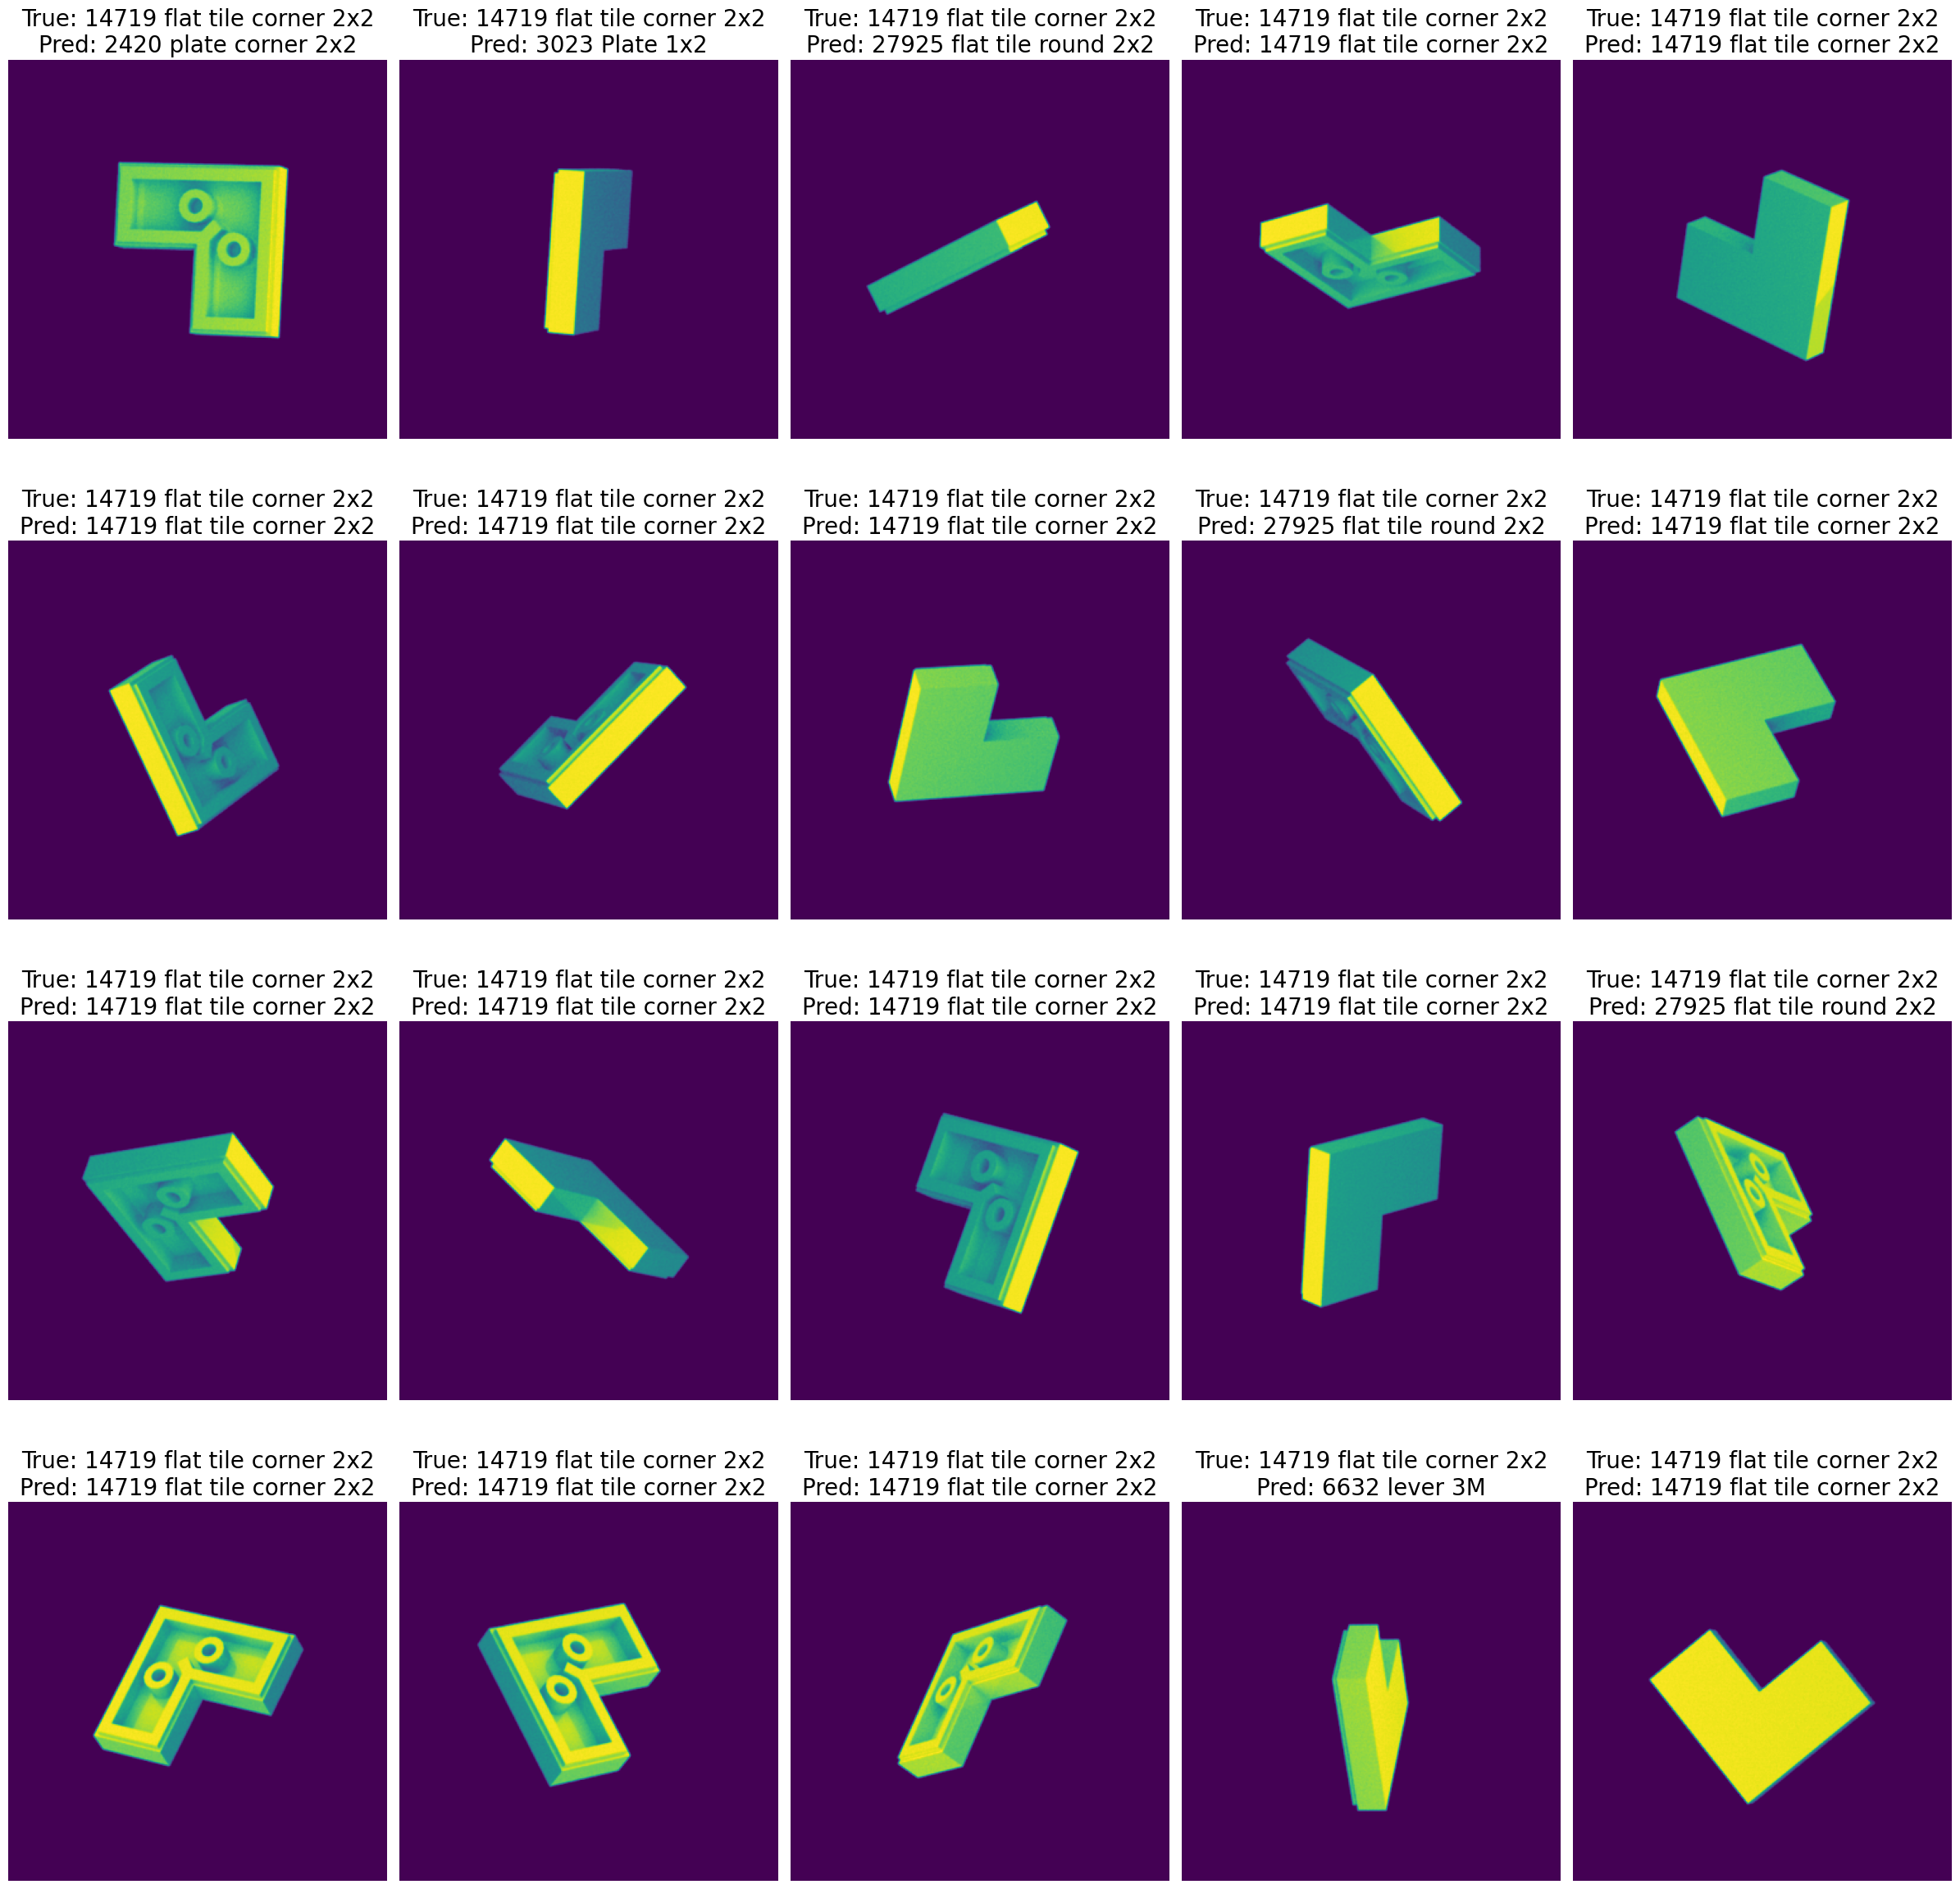

In [85]:
# Visualizziamo le immagini con le etichette vere e predette
def plot_images(images, true_labels, predicted_labels, class_names, num_images):
    plt.figure(figsize=(24, 24))
    for i in range(num_images):
        plt.subplot(4, 5, i + 1)
        plt.imshow(images[i])
        true_label = class_names[true_labels[i]]
        predicted_label = class_names[predicted_labels[i]]
        plt.title(f'True: {true_label}\nPred: {predicted_label}',fontsize=20)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

plot_images(images, y_true, y_hat, class_labels, num_images)

In [89]:
def load_and_preprocess_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Carica l'immagine in scala di grigi
    img = cv2.resize(img, (300, 300))  # Ridimensiona l'immagine a 400x400 pixel
    img = img.astype('float32') / 255.0  # Normalizza i valori dei pixel
    img = np.expand_dims(img, axis=-1)  # Aggiungi la dimensione del canale
    img = np.expand_dims(img, axis=0)  # Aggiungi la dimensione del batch
    return img


In [ ]:
def plot_images(images, true_labels, predicted_labels, class_names, num_images):
    plt.figure(figsize=(24, 24))
    for i in range(num_images):
        plt.subplot(4, 5, i + 1)
        img = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)  # Converti l'immagine da BGR a RGB
        plt.imshow(img)
        true_label = class_names[true_labels[i]] if true_labels else 'N/A'
        predicted_label = class_names[predicted_labels[i]]
        plt.title(f'True: {true_label}\nPred: {predicted_label}', fontsize=20)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

In [90]:
# Funzione per effettuare predizioni su tutte le immagini in una cartella
def predict_on_folder(folder_path):
    for filename in os.listdir(folder_path):
        if filename.endswith(('.jpg', '.jpeg', '.png', '.bmp')):
            img_path = os.path.join(folder_path, filename)
            img_array = load_and_preprocess_image(img_path)
            
            # Predizione con il modello
            predictions = model.predict(img_array)
            predicted_class_index = np.argmax(predictions, axis=1)
            predicted_class_name = class_labels[predicted_class_index[0]]
            
            print(f'File: {filename}, Predicted class: {predicted_class_name}')


In [93]:
folder_path = r'C:\Users\BrunoLuciano\OneDrive - ITS Angelo Rizzoli\Documents\Deep_learning_project\img'

In [ ]:
images, true_labels, predicted_labels = predict_on_folder(folder_path)


In [ ]:
num_images_to_display = min(20, len(images))

In [94]:
plot_images(images, true_labels, predicted_labels, class_labels, num_images_to_display)


1/1 [==============================] - 0s 87ms/step
File: lego.jpg, Predicted class: 4286 roof tile 1x3
1/1 [==============================] - 0s 66ms/step
File: lego2.jpg, Predicted class: 4286 roof tile 1x3
1/1 [==============================] - 0s 58ms/step
File: lego3.jpg, Predicted class: 99301 roof tile inside 3x3
1/1 [==============================] - 0s 54ms/step
File: lego4.jpg, Predicted class: 3040 roof tile 1x2
